In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn-v0_8')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fish.csv')

#### I started by importing the liberaries that i will need and loading the dataset

In [3]:
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
93,Perch,145.0,20.7,22.7,24.2,5.9532,3.6300
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
70,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


#### Got some info about the dataset and looks like there is no missing values but the column's names need to be changed to make them more clear

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


#### I noticed that the minimum weight is 0 which can't be true so i'm going to investigate more but first i will set it to nan

In [6]:
df.loc[df['Weight'] == 0, 'Weight'] = np.nan

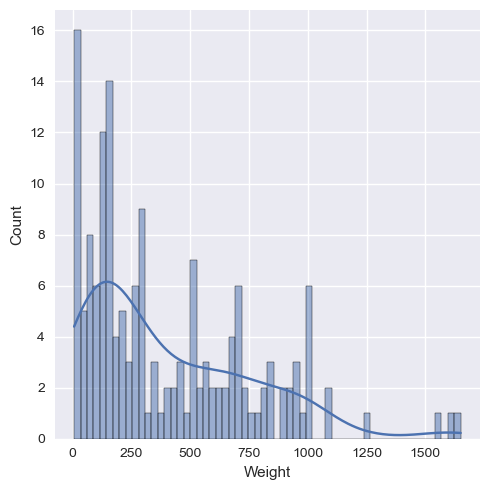

In [7]:
sns.displot(x = df['Weight'], data = df, bins = 60 , kde = True)

In [8]:
bad_values = df['Weight'] <= 50 

In [9]:
df.loc[bad_values]

,Species,Weight,Length1,Length2,Length3,Height,Width
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
150,Smelt,8.7,10.8,11.3,12.6,1.9782,1.2852


In [10]:
df['Weight'].describe().T

count     158.000000
mean      400.847468
std       357.697796
min         5.900000
25%       121.250000
50%       281.500000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

#### Let's investigate more

In [11]:
weight_description = df.groupby('Species').describe().T
weight_description.loc['Weight']

Species,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,35.000000,11.000000,56.000000,17.000000,19.000000,14.000000,6.000000
mean,617.828571,154.818182,382.239286,718.705882,160.052632,11.178571,531.000000
std,209.205709,78.755086,347.617717,494.140765,83.528088,4.131526,309.602972
min,242.000000,55.000000,5.900000,200.000000,40.000000,6.700000,270.000000
25%,462.500000,105.000000,120.000000,345.000000,115.000000,8.950000,279.000000
50%,610.000000,145.000000,207.500000,510.000000,150.000000,9.850000,423.000000
75%,717.000000,185.000000,692.500000,950.000000,174.500000,12.200000,735.000000
max,1000.000000,300.000000,1100.000000,1650.000000,390.000000,19.900000,1000.000000


#### After doing some search i found out that :
#### 1- smelt fish avg weight is 2.5 ounces but can start from less than 1 ounce which makes these values reasonable so i won't change them 
#### 2- roach fish avg weight is 450 grams but these values will be handeled as outliers later in the notebook
#### 3- perch fish avg weight is 2.5 kilograms but these values also will be handeled as outliers later in the notebook


In [12]:
mean_roach = 160.05
df['Weight'].fillna(mean_roach, inplace = True)

#### I imputed the wrong value with the mean of it's species

## Cleaning

In [13]:
df.columns=['species','weight','length_ver','length_diag','length_cross','height','width_dig']

In [14]:
df.duplicated().sum()

0

#### No duplicated values

In [15]:
df.head(10)

,species,weight,length_ver,length_diag,length_cross,height,width_dig
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


#### Got a sample of the data and it seems that everything is in place and ready for the next step

## Handeling outliers

In [16]:
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","Num of Outliers","Handled?"])
    for col in df.columns:
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        outliers = outliers.append({'Feature': col, "Num of Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers

In [17]:
detect_outliers(df.iloc[:,1:])

,Feature,Num of Outliers,Handled?
0,weight,3,True
1,length_ver,3,True
2,length_diag,3,True
3,length_cross,1,True
4,height,0,True
5,width_dig,0,True


#### Found some outliers and Removed all the outliers from the data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,159.0,399.333019,357.075052,5.9000,122.50000,273.0000,650.0000,1650.000
length_ver,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
length_diag,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
length_cross,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
width_dig,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [19]:
df.head()

,species,weight,length_ver,length_diag,length_cross,height,width_dig
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Encoding

In [20]:
df['species'] = df['species'].astype('category') 

In [21]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False )
arr = ohe.fit_transform(df[['species']])
transformed_col = pd.DataFrame(arr)
transformed_col.columns = ['Bream','Parkki','Perch','Pike','Roach','Smelt','Whitefish']
transformed_col

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
df = df.join(transformed_col)

In [23]:
df.head()

,species,weight,length_ver,length_diag,length_cross,height,width_dig,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df.drop(columns = ['species'],inplace = True)

## Correlation

#### First i'm going to plot the correlation between the columns 

<Axes: >

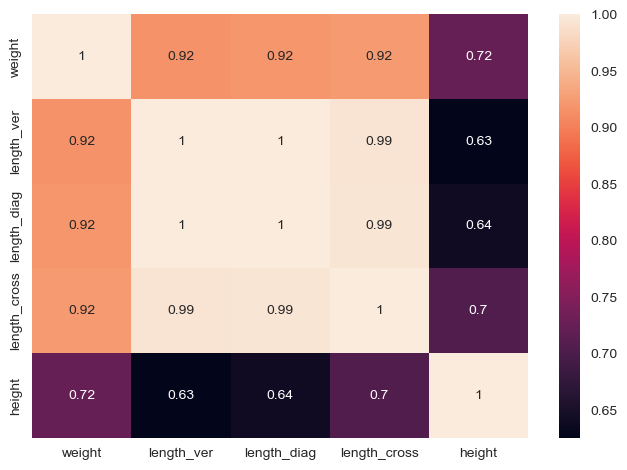

In [25]:
sns.heatmap(df.iloc[:,0:5].corr(), annot = True)

#### Looks like the vertical length, digonal length and the cross length are almost identical

In [26]:
df['length'] = (df['length_ver'] + df['length_diag'] + df['length_cross']) / 3

## Linear regression

### Slicing labels

In [27]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
print(f'x shape = {x.shape}')

x shape = (159, 13)


### splitting the data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

#### The numerical columns are now scaled

### trining the model

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

### predicting the results

In [31]:
y_pred = lin_reg.predict(x_test)

### calculating root mean square error

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root mean squared error = {rmse}')

Root mean squared error = 83.529546567532


In [33]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9398769488256329